In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Library.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Loading CSV file.
df = pd.read_csv('/content/drive/MyDrive/EWU Couses/CSE303  Practice-20251121T155013Z-1-001/CSE303  Practice/Fall 2025/Lab 8  SVM/Lab task/diabetes_data.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [106]:
# 2.Checking for any missing (null) values in the data or if found, apply appropriate methods (e.g. mean or median or mode) to handle them
df.isnull().sum()

,0
Age,25
Gender,520
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
# 3.Identify the unique values in categorical columns and map them accordingly. Display the correlation matrix.
df_copy =df.copy()
df_copy

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,NaN,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,NaN
1,58.0,NaN,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,NaN
2,41.0,NaN,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,NaN
3,45.0,NaN,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,NaN
4,60.0,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,NaN,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,NaN
516,48.0,NaN,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,NaN
517,58.0,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,NaN
518,32.0,NaN,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,NaN


In [ ]:
df_copy.isnull().sum()


,0
Age,25
Gender,520
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [55]:
# Check unique values for Gender
df_copy['Gender'].unique()




array([nan])

In [54]:
# count value of Gender.
df_copy['Gender'].value_counts()

,count
Gender,


In [51]:
# Check unique values for the Target column (class)
df_copy['class'].unique()

array([nan])

In [53]:
#count value class.
df_copy['class'].value_counts()

,count
class,


In [83]:
# Check unique values for a Symptom (e.g., Polyuria)
# Since most symptoms have the same Yes/No structure, you can check one to be sure
df_copy['Polyuria'].unique()



array([0, 1])

In [58]:
# count values.
df_copy['Polyuria'].value_counts()

,count
Polyuria,
No,262
Yes,258


In [84]:
#Mapping Gender
Gender_mapping = {'Male': 1, 'Female':0}
df_copy['Gender'] =df['Gender'].map(Gender_mapping)

#Mapping target class
Class_mapping = {'Positive': 1, 'Negative': 0}
df_copy['class'] = df['class'].map(Class_mapping)

#Mapping Symptoms (Yes/No)
# We define the dictionary once and apply it to the specific columns
YesNo_mapping = {'Yes': 1, 'No': 0}

df_copy['Polyuria'] = df['Polyuria'].map(YesNo_mapping)
df_copy['Polydipsia'] = df['Polydipsia'].map(YesNo_mapping)
df_copy['sudden weight loss'] = df['sudden weight loss'].map(YesNo_mapping)
df_copy['weakness'] = df['weakness'].map(YesNo_mapping)
df_copy['Polyphagia'] = df['Polyphagia'].map(YesNo_mapping)
df_copy['Genital thrush'] = df['Genital thrush'].map(YesNo_mapping)
df_copy['visual blurring'] = df['visual blurring'].map(YesNo_mapping)
df_copy['Itching'] = df['Itching'].map(YesNo_mapping)
df_copy['Irritability'] = df['Irritability'].map(YesNo_mapping)
df_copy['delayed healing'] = df['delayed healing'].map(YesNo_mapping)
df_copy['partial paresis'] = df['partial paresis'].map(YesNo_mapping)
df_copy['muscle stiffness'] = df['muscle stiffness'].map(YesNo_mapping)
df_copy['Alopecia'] = df['Alopecia'].map(YesNo_mapping)
df_copy['Obesity'] = df['Obesity'].map(YesNo_mapping)


#Check the data to ensure everthing is numeric now
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 495 non-null    float64
 1   Gender              0 non-null      float64
 2   Polyuria            520 non-null    int64  
 3   Polydipsia          520 non-null    int64  
 4   sudden weight loss  520 non-null    int64  
 5   weakness            520 non-null    int64  
 6   Polyphagia          520 non-null    int64  
 7   Genital thrush      520 non-null    int64  
 8   visual blurring     520 non-null    int64  
 9   Itching             520 non-null    int64  
 10  Irritability        520 non-null    int64  
 11  delayed healing     520 non-null    int64  
 12  partial paresis     520 non-null    int64  
 13  muscle stiffness    491 non-null    float64
 14  Alopecia            520 non-null    int64  
 15  Obesity             520 non-null    int64  
 16  class   

In [95]:
#Displaying the correlation matrix.
corr = df_copy.corr()
corr

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,NaN,0.201839,0.140330,0.064922,0.236552,0.319180,0.102001,0.420089,0.302637,0.214699,0.264489,0.240998,0.348469,0.325478,0.134716,NaN
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polyuria,0.201839,NaN,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.160500,-0.144192,0.126567,NaN
Polydipsia,0.140330,NaN,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.203247,-0.310964,0.098691,NaN
sudden weight loss,0.064922,NaN,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.113398,-0.202727,0.169294,NaN
weakness,0.236552,NaN,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.277266,0.090490,0.045665,NaN
Polyphagia,0.319180,NaN,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.335651,-0.053498,0.029785,NaN
Genital thrush,0.102001,NaN,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.101529,0.204847,0.053828,NaN
visual blurring,0.420089,NaN,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.442115,0.014604,0.109005,NaN
Itching,0.302637,NaN,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.231828,0.266506,0.001894,NaN


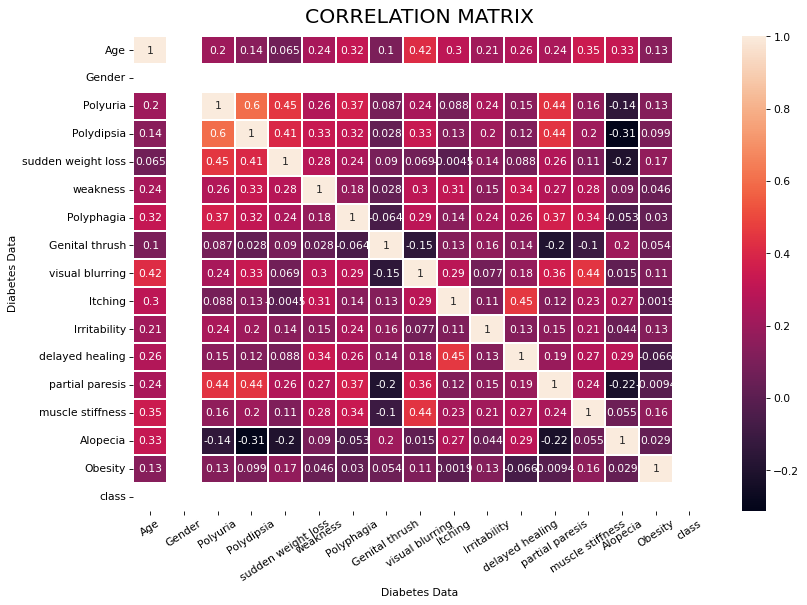

In [64]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(corr, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Diabetes Data')
plt.ylabel('Diabetes Data')
plt.xticks(rotation=33)
plt.show()

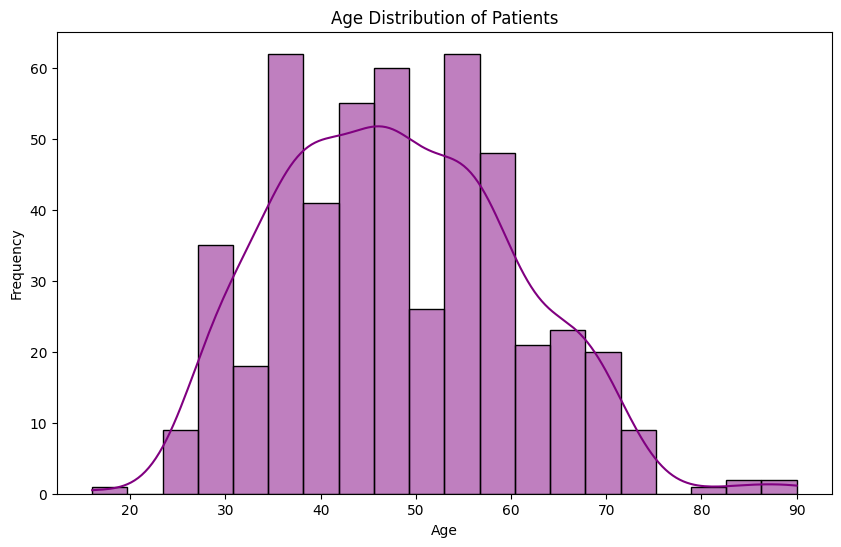

In [65]:
#4.Perform data visualization using various types of plots, such as scatter plot, line plot , bar plot, pie chart, histogram, count plot, etc. to explore and understand the data. Write about your observations.


In [100]:
df_copy.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,NaN,0,1,0,1,0,0,0,1,0,1,0,1.0,1,1,NaN
1,58.0,NaN,0,0,0,1,0,0,1,0,0,0,1,0.0,1,0,NaN
2,41.0,NaN,1,0,0,1,1,0,0,1,0,1,0,1.0,1,0,NaN
3,45.0,NaN,0,0,1,1,1,1,0,1,0,1,0,0.0,0,0,NaN
4,60.0,NaN,1,1,1,1,1,0,1,1,1,1,1,1.0,1,1,NaN


In [98]:
#5.Finally,process the data and run SVM. Evaluate the model's performance bypresenting both the accuracy and the confusion matrix.
#calculating the mean values and fill up them with the missing values.
Gender_mean = df_copy['Gender'].mean()
print(Gender_mean)

class_mean = df_copy['class'].mean()
print(class_mean)

df_copy['Gender'].fillna(Gender_mean, inplace=True)
df_copy['class'].fillna(class_mean, inplace=True)
df_copy.isnull().sum()
X=df.drop(columns=['class'])
Y=df['class']
#spliting the data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.metrics import accuracy_score, confusion_matrix


# 2. Preprocessing (The Easy Way)
# We create a "Map" of what to swap.
# 'Yes' becomes 1.0, 'No' becomes 0.0, etc.
mapping = {
    'Yes': 1.0,
    'No': 0.0,
    'Male': 1.0,
    'Female': 0.0,
    'Positive': 1.0,
    'Negative': 0.0
}

# Apply the replacement to the whole table at once
df_copy = df_copy.replace(mapping)

print("Data converted successfully:")
print(df.head())

# 5. Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Run SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# 7. Evaluate
y_pred = svm_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")

# 8. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Data converted successfully:
    Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0  40.0     NaN       0.0         1.0                 0.0       1.0   
1  58.0     NaN       0.0         0.0                 0.0       1.0   
2  41.0     NaN       1.0         0.0                 0.0       1.0   
3  45.0     NaN       0.0         0.0                 1.0       1.0   
4  60.0     NaN       1.0         1.0                 1.0       1.0   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0         0.0             0.0              0.0      1.0           0.0   
1         0.0             0.0              1.0      0.0           0.0   
2         1.0             0.0              0.0      1.0           0.0   
3         1.0             1.0              0.0      1.0           0.0   
4         1.0             0.0              1.0      1.0           1.0   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0              1.0           

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values